In [323]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

base_path = "data"
dataset_csv_path = os.path.join(base_path,"data.csv")
dataset_description_csv_path = os.path.join(base_path,"data_description.xlsx")


In [324]:
# Load Dataset Description and Clean it
dataset_description = pd.read_excel(dataset_description_csv_path)
dataset_description.loc[dataset_description['Name'] == 'InputB5', 'Description'] = 'Mass flow rate'
dataset_description = dataset_description.dropna()
dataset_description = dataset_description.set_index('Name')
dataset_description


,Description,Units
Name,,
InputC1,O2 percentage in tank 1,%
InputC2,Liquid to reduce the pH in tank 1,l/h
InputC3,Filtered sludge going back to tank 1,m3/h
InputC4,Outside air,Nm3/h
InputC5,Height in tank 1,m
InputC6,Flowrate to pH measurement in tank 1,l/h
InputC7,pH of liquid in tank 1,pH
InputC8,Flowrate to O2 measurement in tank 1,l/h
InputC9,O2 dissolved in tank 1,mg/l


In [325]:

# read the dataset
dataset = pd.read_csv(dataset_csv_path)


In [326]:
# set the name of the first column to TimeTaken
dataset = dataset.rename(columns={dataset.columns[0]: "TimeStamp"})
# set datatupe of TimeTaken to datetime
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76474 entries, 0 to 76473
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TimeStamp  76474 non-null  datetime64[ns]
 1   InputC1    71948 non-null  float64       
 2   InputC2    70943 non-null  float64       
 3   InputC3    71116 non-null  float64       
 4   InputC4    76396 non-null  float64       
 5   InputC5    67461 non-null  float64       
 6   InputC6    70914 non-null  float64       
 7   InputC7    70852 non-null  float64       
 8   InputC8    70828 non-null  float64       
 9   InputC9    70880 non-null  float64       
 10  InputC10   70802 non-null  float64       
 11  InputE1    70871 non-null  float64       
 12  InputE2    74587 non-null  float64       
 13  InputE3    33120 non-null  float64       
 14  InputD1    71923 non-null  float64       
 15  InputD2    71190 non-null  float64       
 16  InputD3    71138 non-null  float64      

In [327]:
def plot_data_from_column_using_date_range(column_name, start_date, end_date):
    dataset[column_name].loc[(dataset['TimeStamp'] > start_date) & (dataset['TimeStamp'] < end_date)].plot(figsize=(20,10))

In [328]:
# how many null values are there in each column
dataset.isnull().sum()

TimeStamp        0
InputC1       4526
InputC2       5531
InputC3       5358
InputC4         78
InputC5       9013
InputC6       5560
InputC7       5622
InputC8       5646
InputC9       5594
InputC10      5672
InputE1       5603
InputE2       1887
InputE3      43354
InputD1       4551
InputD2       5284
InputD3       5336
InputD4         76
InputD5      10121
InputD6       5593
InputD7       5346
InputD8       5588
InputD9       1587
InputD10      5582
InputA1        724
InputA2      25422
InputA3        169
InputA4       9624
InputA5       7778
InputA6       5589
InputB1       3794
InputB2       3775
InputB3         90
InputB4       9525
InputB5      33308
InputB6       3855
Target        6188
dtype: int64

In [329]:
# Data Cleaning and Imputation
# Null Values 
# Method 1: Drop all the rows with null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

# Method 2 : Replace null values with the mean of the column
# # replace all the null values in InputC1 with the mean of the column from the same day
# dataset['InputC1'] = dataset.groupby(dataset['TimeStamp'].dt.date)['InputC1'].transform(lambda x: x.fillna(x.mean()))


TimeStamp    0
InputC1      0
InputC2      0
InputC3      0
InputC4      0
InputC5      0
InputC6      0
InputC7      0
InputC8      0
InputC9      0
InputC10     0
InputE1      0
InputE2      0
InputE3      0
InputD1      0
InputD2      0
InputD3      0
InputD4      0
InputD5      0
InputD6      0
InputD7      0
InputD8      0
InputD9      0
InputD10     0
InputA1      0
InputA2      0
InputA3      0
InputA4      0
InputA5      0
InputA6      0
InputB1      0
InputB2      0
InputB3      0
InputB4      0
InputB5      0
InputB6      0
Target       0
dtype: int64

In [330]:
dataset.describe()

,TimeStamp,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
count,17527,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,...,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000,17527.000000
mean,2022-08-20 01:23:42.359787776,17.593972,33.089738,88.479051,716.138192,17.722226,1607.951553,7.436448,1819.550922,1.500427,...,70.839968,15.895899,6.784977,29.331343,30.143704,112.932035,3.042991,3.348306,6.709526,21.426566
min,2022-05-21 00:35:00,15.806650,-0.440424,-2.850274,26.812020,17.181650,3.750000,7.052068,3.269135,0.212584,...,0.118166,-0.071140,2.397020,16.745860,-0.770695,0.525000,0.007180,-0.146004,4.538803,-0.003886
25%,2022-08-04 01:02:30,17.326025,23.819205,89.738925,514.335150,17.383695,1470.142000,7.351479,1807.632000,1.450305,...,64.882770,10.759190,6.650610,26.815250,22.017035,57.861575,2.012487,1.680634,6.323720,16.690705
50%,2022-08-19 10:00:00,17.618970,33.141430,89.962800,624.610600,17.470800,1718.374000,7.485854,1863.819000,1.511549,...,75.866490,13.791950,6.764565,29.617420,28.477090,100.497800,2.949641,2.799487,6.688683,19.444680
75%,2022-09-08 04:32:30,17.943575,40.889745,90.101685,832.247500,18.294035,1798.161500,7.503230,1904.365500,1.563032,...,81.183280,19.138840,6.903285,32.453460,36.666910,156.138850,3.917330,4.552911,7.039086,23.968210
max,2022-09-23 13:45:00,18.391910,202.836800,248.376300,1527.085000,18.415400,2116.163000,8.385586,2059.961000,3.381146,...,92.420960,78.275940,12.137340,43.624690,127.795700,571.200000,10.165010,24.589740,8.939406,153.000700
std,NaN,0.409134,15.272905,10.192786,287.860807,0.432308,302.791728,0.123244,173.530147,0.200388,...,13.500282,8.224991,0.518383,4.261718,11.662200,72.436296,1.302816,2.331414,0.674223,12.153618


In [331]:
def plot_histogram_from_column(column_name, bins):
    plt.figure(figsize=(20,10))
    dataset[column_name].hist(figsize=(20,10), bins=bins)
    plt.show()
    
def drop_from_column_using_upper_quantile(dataset,column_name, upper_quantile):
    dataset = dataset[dataset[column_name] < dataset[column_name].quantile(upper_quantile)]
    return dataset

def drop_from_column_using_lower_quantile(dataset,column_name, lower_quantile):
    dataset = dataset[dataset[column_name] > dataset[column_name].quantile(lower_quantile)]
    return dataset  

In [332]:
# Outliers
# Method 1: Drop all the rows with outliers
# # Column InputC2
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC2', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC2', 0.25)
# # Column InputC3
# dataset = drop_outliers_from_column_using_upper_quantile( dataset,'InputC3', 0.75)
# dataset = drop_outliers_from_column_using_lower_quantile( dataset,'InputC3', 0.25)




# remove 

# Outlier Strategy
- For each column, we want to define our strategy for detecting outliers and then further specify our strategy for dealing with them in the next step.

### Outlier Detection Strategy per column
- **Input C1:** All the values are pretty close to the mean. I don't believe there are any outliers. (Assuming Method 1 for null values was used)

- **Input C2:** Since the data doesn't appear to be left or right skewed, we can just use the upper and lower quartile. rather than z-score for outlier detection.

- **Input C3:** 


In [333]:
def calculate_zscore_from_column(dataset,column_name):
    dataset[column_name+'_zscore'] = (dataset[column_name] - dataset[column_name].mean())/dataset[column_name].std(ddof=0)
    return dataset
# def calculate

In [334]:
dataset['InputC2'].describe()

count    17527.000000
mean        33.089738
std         15.272905
min         -0.440424
25%         23.819205
50%         33.141430
75%         40.889745
max        202.836800
Name: InputC2, dtype: float64

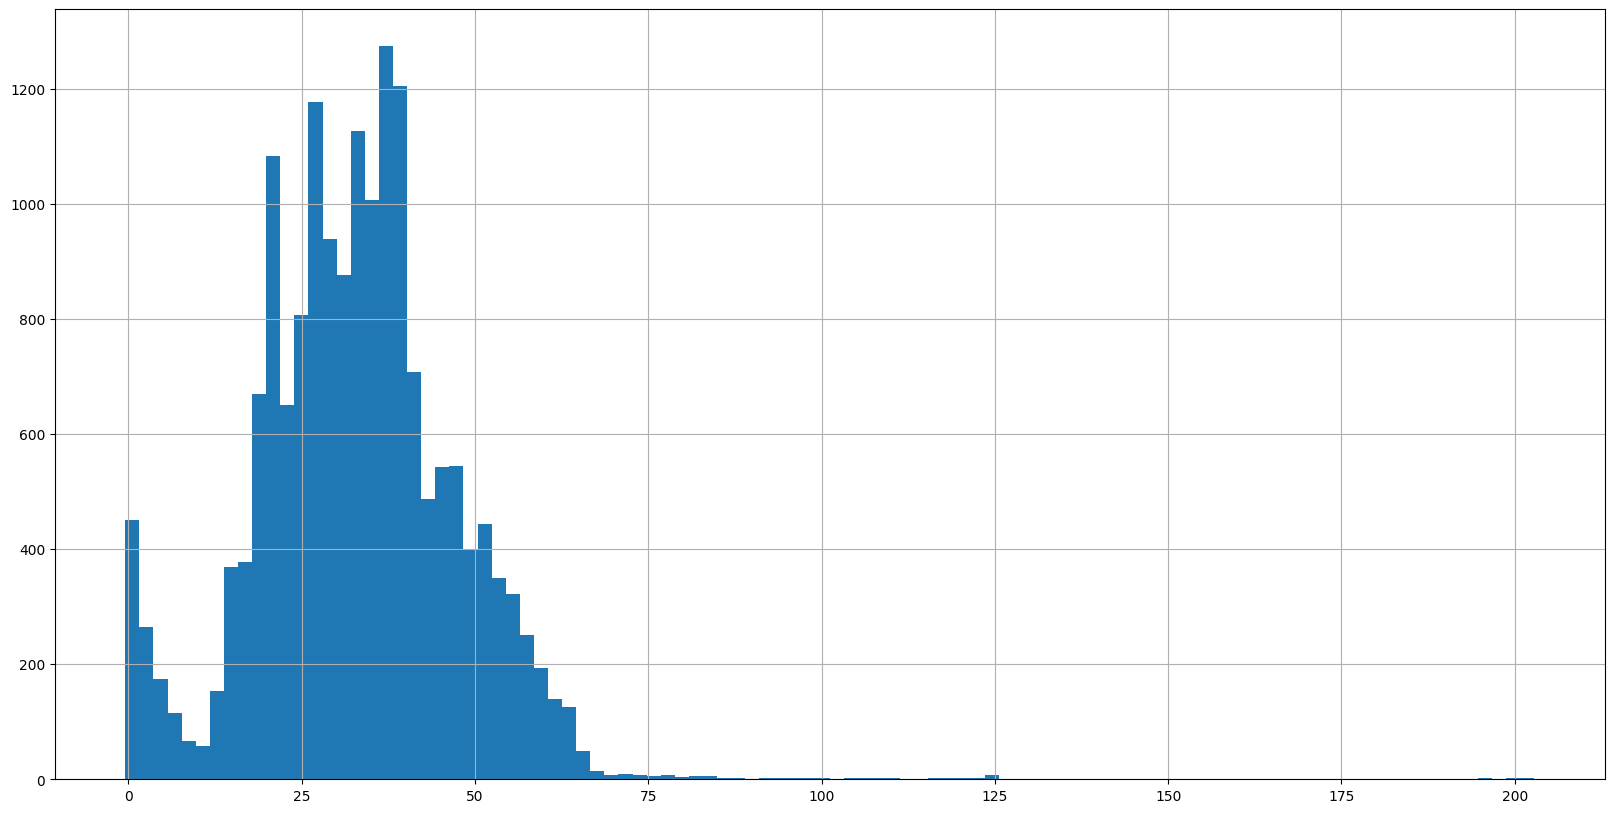

In [335]:
plot_histogram_from_column('InputC2',100)